# Optimization of winter flights from Anapa city (per 2017 year)

In [280]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [281]:
df = pd.read_csv('anapa_flights.csv')
df.sample(5)

,flight_id,economy_avg_amount,business_avg_amount,actual_departure,actual_arrival,duration,minutes_delay,december,january,february,...,model,boeing_737_300,sukhoi_superjet_100,economy_class_capacity,business_class_capacity,airplane_capacity,economy_pass_qty,business_pass_qty,total_pass_qty,occupancy_perc
106,136827,6335.0,18900.0,2017-02-18T09:26:00Z,2017-02-18T10:17:00Z,0.850000,2.0,0,0,1,...,Sukhoi Superjet-100,0,1,85,12,97,85.0,12.0,97.0,100.0
107,136838,6332.0,18900.0,2017-01-24T09:30:00Z,2017-01-24T10:21:00Z,0.850000,6.0,0,1,0,...,Sukhoi Superjet-100,0,1,85,12,97,76.0,10.0,86.0,88.0
91,136733,6337.0,18900.0,2017-01-09T09:27:00Z,2017-01-09T10:18:00Z,0.850000,3.0,0,1,0,...,Sukhoi Superjet-100,0,1,85,12,97,82.0,12.0,94.0,96.0
50,136441,12262.0,36600.0,2017-02-03T10:07:00Z,2017-02-03T11:47:00Z,1.666667,2.0,0,0,1,...,Boeing 737-300,1,0,118,12,130,117.0,11.0,128.0,98.0
43,136403,12262.0,36600.0,2017-02-20T10:06:00Z,2017-02-20T11:46:00Z,1.666667,1.0,0,0,1,...,Boeing 737-300,1,0,118,12,130,117.0,12.0,129.0,99.0


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   economy_avg_amount       118 non-null    float64
 2   business_avg_amount      118 non-null    float64
 3   actual_departure         127 non-null    object 
 4   actual_arrival           127 non-null    object 
 5   duration                 127 non-null    float64
 6   minutes_delay            127 non-null    float64
 7   december                 127 non-null    int64  
 8   january                  127 non-null    int64  
 9   february                 127 non-null    int64  
 10  departure_city           127 non-null    object 
 11  arrival_city             127 non-null    object 
 12  moscow_arrival           127 non-null    int64  
 13  belgorod_arrival         127 non-null    int64  
 14  novokuznetsk_arrival     1

## 1. NAN Values Processing
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора данных. 
С пропусками нужно быть внимательными, так как **даже отсутствие информации может быть важным признаком.**   
По этому перед обработкой NAN будем выносить информацию о наличии пропусков, как отдельный признак.

У нас пропущенные значения в признаках economy_avg_amount, business_avg_amount, economy_pass_qty, business_pass_qty, total_pass_qty, occupancy_perc. Их относительно немного, всего 9. 

In [283]:
df.isnull().sum()

flight_id                  0
economy_avg_amount         9
business_avg_amount        9
actual_departure           0
actual_arrival             0
duration                   0
minutes_delay              0
december                   0
january                    0
february                   0
departure_city             0
arrival_city               0
moscow_arrival             0
belgorod_arrival           0
novokuznetsk_arrival       0
model                      0
boeing_737_300             0
sukhoi_superjet_100        0
economy_class_capacity     0
business_class_capacity    0
airplane_capacity          0
economy_pass_qty           9
business_pass_qty          9
total_pass_qty             9
occupancy_perc             9
dtype: int64

Создадим булевые признаки для пропусков, где 0 - пропуск, 1 - истинное значение:

In [284]:
df['economy_avg_amount_NAN'] = pd.isna(
    df['economy_avg_amount']).astype('uint8')
df['business_avg_amount_NAN'] = pd.isna(
    df['business_avg_amount']).astype('uint8')
df['economy_pass_qty_NAN'] = pd.isna(df['economy_pass_qty']).astype('uint8')
df['business_pass_qty_NAN'] = pd.isna(df['business_pass_qty']).astype('uint8')
df['total_pass_qty_NAN'] = pd.isna(df['total_pass_qty']).astype('uint8')
df['occupancy_perc_NAN'] = pd.isna(df['occupancy_perc']).astype('uint8')

Мы видим, что пропуски находятся по единственному направлению - из Анапы в Новокузнецк. Значит, по какой-то причине, нам не предоставили данные по билетным данным пассажиров. 

In [285]:
df.groupby(['novokuznetsk_arrival'])['economy_avg_amount_NAN', 'business_avg_amount_NAN', 'economy_pass_qty_NAN',
                                     'business_pass_qty_NAN', 'total_pass_qty_NAN', 'occupancy_perc_NAN'].sum()

<ipython-input-285-4ffcca15e4fb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['novokuznetsk_arrival'])['economy_avg_amount_NAN', 'business_avg_amount_NAN', 'economy_pass_qty_NAN',


,economy_avg_amount_NAN,business_avg_amount_NAN,economy_pass_qty_NAN,business_pass_qty_NAN,total_pass_qty_NAN,occupancy_perc_NAN
novokuznetsk_arrival,,,,,,
0,0,0,0,0,0,0
1,9,9,9,9,9,9


Так как расстояние от Анапы до Новокузнецка больше, чем до Москвы в 3 раза, то увеличиваем максимальные стоимости билетов в 2 раза для заполнения пропусков:

In [286]:
df['economy_avg_amount'] = df['economy_avg_amount'].fillna(
    df['economy_avg_amount'].max() * 2)

In [287]:
df['business_avg_amount'] = df['business_avg_amount'].fillna(
    df['business_avg_amount'].max() * 2)

Данные пассажиропотока для рейсов Анапа - Новокузнецк берём, как среднее от заполняемости рейсов по всему датасету:

In [288]:
df['economy_pass_qty'] = df['economy_pass_qty'].fillna(
    df['economy_pass_qty'].mean())

In [289]:
df['business_pass_qty'] = df['business_pass_qty'].fillna(
    df['business_pass_qty'].mean())

In [290]:
df['total_pass_qty'] = df['total_pass_qty'].fillna(
    df['economy_pass_qty']+df['business_pass_qty'])

Теперь посчитаем для пропущенных значений по Новокузнецку загрузку рейсов в процентах:

In [312]:
df['occupancy_perc'] = df['occupancy_perc'].fillna(round(
    df['total_pass_qty']*100 / df['airplane_capacity']))

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   economy_avg_amount       127 non-null    float64
 2   business_avg_amount      127 non-null    float64
 3   actual_departure         127 non-null    object 
 4   actual_arrival           127 non-null    object 
 5   duration                 127 non-null    float64
 6   minutes_delay            127 non-null    float64
 7   december                 127 non-null    int64  
 8   january                  127 non-null    int64  
 9   february                 127 non-null    int64  
 10  departure_city           127 non-null    object 
 11  arrival_city             127 non-null    object 
 12  moscow_arrival           127 non-null    int64  
 13  belgorod_arrival         127 non-null    int64  
 14  novokuznetsk_arrival     1

Итак, мы обработали все пропущенные значения. Идём дальше.

## 2. Feature Engineering

Вернёмся к истокам задачи. Нам необходимо оценить прибыльность рейсов из Анапы и затем принять решение по оптимизации и / или исключению конкретных рейсов.

### 2.1. Profit calculation

Для начала подсчитаем прибыль по всем нашим рейсам. Для этого достаточно найти произведение количества пассажиров на стоимость их билетов.
Также мы сепарировали данные из датасета на классы «Эконом» и «Бизнес», чтобы подсчитать доходность по этим классам, а затем их сложить.

In [293]:
df['total_profit'] = df['economy_avg_amount']*df['economy_pass_qty'] + \
    df['business_avg_amount']*df['business_pass_qty']

### 2.2. Costs calculation

#### 2.2.1. fuel_costs

Расход топлива составляет для:
Boeing 737 300 - 2600л/ч,
Sukhoi Superjet 100 - 1900л/ч. 
Самолёты заправляются авиационным керосином ТС-1, стоимость 1л с учётом доставки составляет 28р. 
Для вычисления расходов на топливо понадобится продолжительность рейса duration умножить на норму расхода топлива и стоимость за 1 литр. Также берём в расчёт то, на каком самолёте выполнялся тот или иной рейс. 

In [294]:
df['fuel_costs'] = round(df['boeing_737_300']*df['duration']*2600*28) + \
    round(df['sukhoi_superjet_100']*df['duration']*1900*28)

#### 2.2.2. max_profit

Данных по остальным расходам у нас нет. Для того, чтобы их узнать, необходимо провести более детальный поиск или уточнить данные у представителя авиакомпании. 

Также мы нашли информацию, что расходы на авиаперевозки условно можно разделить по группам на проценты от прибыли: 20% - зарплата сотрудникам авиакомпании, 16% - затраты на владение авиапарком, 14% - налоги и сборы, 11% - техобслуживание, 9% - другие расходы.

Мы понимаем, что это весьма приблизительный расчёт по процентовкам. За неимением других данных посчитаем расходы по этим данным. Обратим внимание, что мы будем вычислять проценты от максимальной возможной выручки за рейс, то есть предварительно посчитаем, какая прибыль была бы при максимальной загрузке (100%):

In [295]:
df['max_profit'] = df['economy_avg_amount']*df['economy_class_capacity'] + \
    df['business_avg_amount']*df['business_class_capacity']

#### 2.2.3. staff_salary, aircraft_ownership_cost, taxes, maintenance, other_expenses

Теперь посчитаем расходы по названным выше группам по заявленным процентам:

In [296]:
df['staff_salary'] = round(df['max_profit']*0.2)

In [297]:
df['aircraft_ownership_cost'] = round(df['max_profit']*0.16)

In [298]:
df['taxes'] = round(df['max_profit']*0.14)

In [299]:
df['maintenance'] = round(df['max_profit']*0.11)

In [300]:
df['other_expenses'] = round(df['max_profit']*0.09)

#### 2.2.4. net_profit

Становится ещё интереснее. Вычислим чистую прибыль. Для этого из total_profit вычтем все посчитанные выше расходы:

In [301]:
df['net_profit'] = round(df['total_profit'] - df['fuel_costs'] - df['staff_salary'] - \
    df['aircraft_ownership_cost'] - df['taxes'] - \
    df['maintenance'] - df['other_expenses'])

### 2.3. Flight analysis

#### 2.3.1. By city direction

In [304]:
cont = df.groupby('arrival_city', axis=0).sum()
cont['Total'] = cont['moscow_arrival'] + \
    cont['belgorod_arrival'] + cont['novokuznetsk_arrival']

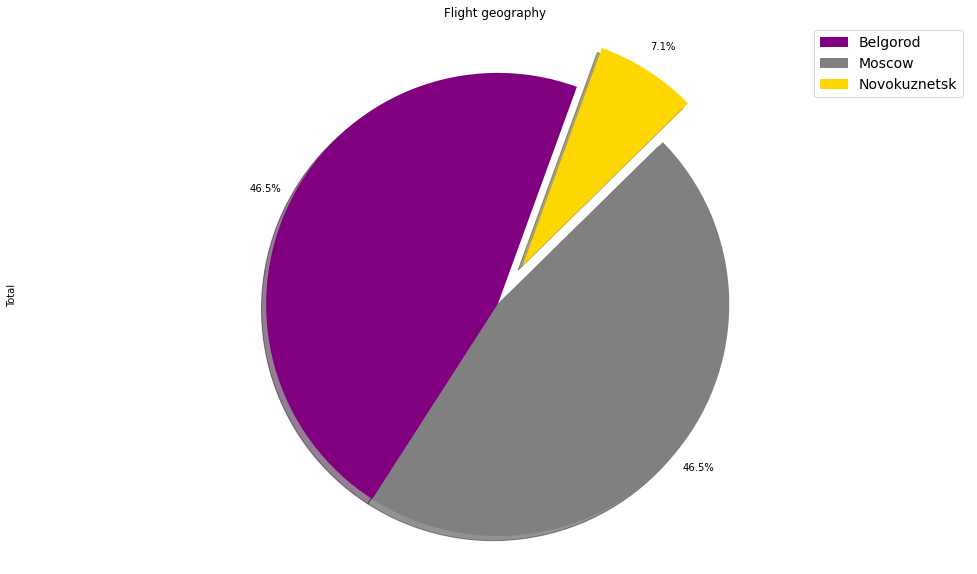

In [303]:
colors = ['purple', 'grey', 'gold']
explode = [0, 0, 0.2]
cont['Total'].plot(kind='pie', figsize=(17, 10),
                   autopct='%1.1f%%', startangle=70,
                   shadow=True, labels=None, pctdistance=1.12, colors=colors, explode=explode)
plt.title('Flight geography')
plt.axis('equal')
plt.legend(labels=cont.index, loc='upper right', fontsize=14)
plt.show()

Видим, что в Мсокву и Белгород летало одинаковое количество рейсов - по 59, а в Новокузнецк - всего лишь 9. В будущем стоит подумать, не отказаться ли от направления в Новокузнецк совсем.

#### 2.3.2. By occupancy by city

Теперь оценим загрузку рейсов по этим направлениям:

In [306]:
ma = df.groupby(['occupancy_perc'])['moscow_arrival'].sum()
na = df.groupby(['occupancy_perc'])['novokuznetsk_arrival'].sum()
ba = df.groupby(['occupancy_perc'])['belgorod_arrival'].sum()

Text(0, 0.5, 'Flight occupancy, %')

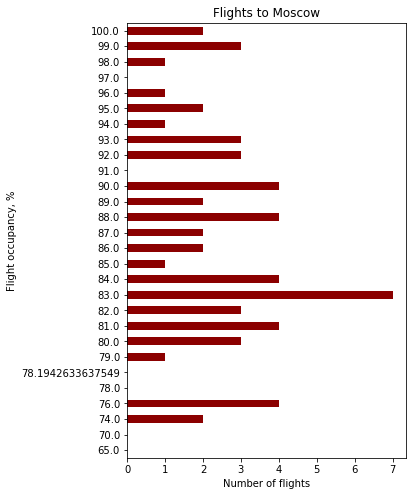

In [307]:
ma.plot(kind='barh', figsize=(5, 8), color='darkred')
plt.title('Flights to Moscow')
plt.xlabel('Number of flights')
plt.ylabel('Flight occupancy, %')

Text(0, 0.5, 'Flight occupancy, %')

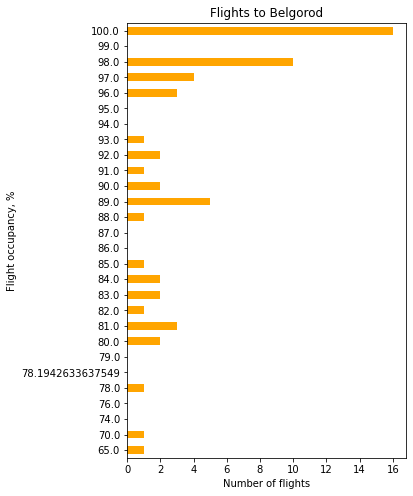

In [308]:
ba.plot(kind='barh', figsize=(5, 8), color='orange')
plt.title('Flights to Belgorod')
plt.xlabel('Number of flights')
plt.ylabel('Flight occupancy, %')

Text(0, 0.5, 'Flight occupancy, %')

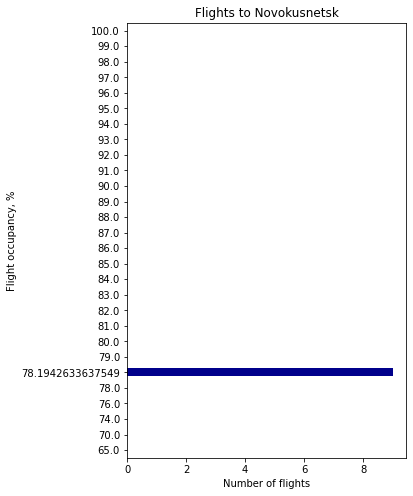

In [313]:
na.plot(kind='barh', figsize=(5, 8), color='darkblue')
plt.title('Flights to Novokusnetsk')
plt.xlabel('Number of flights')
plt.ylabel('Flight occupancy, %')

Анализируя загрузку по городам, видим, что в Белгород самолёты заполнялись охотнее, чем в Москву. При этом на одном из рейсов  в Белгород зафиксирована минимальная загрузка - 65%. В Новокузнецке получилась константа за счёт заполнения нами пропусков.

### 2.4. Profitability assessment

И на десерт осталась оценка прибыльности рейсов и рекомендации по оптимизации направлений. 

Посмотрим те рейсы, которые дали отрицательную чистю прибыль:

In [315]:
df[df['net_profit'] < 0]

,flight_id,economy_avg_amount,business_avg_amount,actual_departure,actual_arrival,duration,minutes_delay,december,january,february,...,occupancy_perc_NAN,total_profit,fuel_costs,max_profit,staff_salary,aircraft_ownership_cost,taxes,maintenance,other_expenses,net_profit
2,136122,12241.0,36600.0,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1.666667,3.0,0,1,0,...,0,1.430967e+06,121333.0,1883638.0,376728.0,301382.0,263709.0,207200.0,169527.0,-8912.0
12,136178,12280.0,36600.0,2017-01-29T10:10:00Z,2017-01-29T11:49:00Z,1.650000,4.0,0,1,0,...,0,1.434600e+06,120120.0,1888240.0,377648.0,302118.0,264354.0,207706.0,169942.0,-7288.0
21,136250,12253.0,36600.0,2017-02-08T10:06:00Z,2017-02-08T11:47:00Z,1.683333,2.0,0,0,1,...,0,1.407823e+06,122547.0,1885054.0,377011.0,301609.0,263908.0,207356.0,169655.0,-34263.0
54,136464,12277.0,36600.0,2017-01-09T10:07:00Z,2017-01-09T11:47:00Z,1.666667,2.0,0,1,0,...,0,1.397961e+06,121333.0,1887886.0,377577.0,302062.0,264304.0,207667.0,169910.0,-44892.0
62,136523,24562.0,73200.0,2017-01-10T06:14:00Z,2017-01-10T11:26:00Z,5.200000,11.0,0,1,0,...,1,3.021503e+06,378560.0,3776716.0,755343.0,604275.0,528740.0,415439.0,339904.0,-758.0
77,136642,6333.0,18900.0,2017-01-30T09:28:00Z,2017-01-30T10:17:00Z,0.816667,2.0,0,1,0,...,0,5.309820e+05,43447.0,765105.0,153021.0,122417.0,107115.0,84162.0,68859.0,-48039.0
102,136807,6330.0,18900.0,2017-02-23T09:28:00Z,2017-02-23T10:18:00Z,0.833333,3.0,0,0,1,...,0,5.310000e+05,44333.0,764850.0,152970.0,122376.0,107079.0,84134.0,68836.0,-48728.0
109,136844,6325.0,18900.0,2017-02-28T09:26:00Z,2017-02-28T10:16:00Z,0.833333,1.0,0,0,1,...,0,5.751250e+05,44333.0,764425.0,152885.0,122308.0,107020.0,84087.0,68798.0,-4306.0


Посмотрим на данные по этим рейсам более пристально, чтобы сделать ценные инсайты. Для начала посмотрим на загрузку этих рейсов в процентах. Видим, что все рейсы, которые показали отрицательные результаты, были с загрузкой < 82%:

In [316]:
df[df['net_profit'] < 0]['occupancy_perc']

2      74.000000
12     76.000000
21     76.000000
54     76.000000
62     78.194263
77     65.000000
102    70.000000
109    81.000000
Name: occupancy_perc, dtype: float64

Очевидно, что нам придётся отказаться от нерентабельных рейсов (с отрицательной выручкой). Удалим их из датасета:

In [317]:
df = df.loc[df['net_profit'] > 0]

Посмотрим теперь на список рейсов, загрузка которых была меньше 82%:

In [318]:
df[df['occupancy_perc'] < 82]

,flight_id,economy_avg_amount,business_avg_amount,actual_departure,actual_arrival,duration,minutes_delay,december,january,february,...,occupancy_perc_NAN,total_profit,fuel_costs,max_profit,staff_salary,aircraft_ownership_cost,taxes,maintenance,other_expenses,net_profit
14,136185,12277.0,36600.0,2017-01-14T10:06:00Z,2017-01-14T11:49:00Z,1.716667,4.0,0,1,0,...,0,1.520038e+06,124973.0,1887886.0,377577.0,302062.0,264304.0,207667.0,169910.0,73545.0
15,136202,12281.0,36600.0,2017-01-05T10:07:00Z,2017-01-05T11:49:00Z,1.700000,4.0,0,1,0,...,0,1.495609e+06,123760.0,1888358.0,377672.0,302137.0,264370.0,207719.0,169952.0,49999.0
28,136282,12262.0,36600.0,2017-01-16T10:07:00Z,2017-01-16T11:48:00Z,1.683333,3.0,0,1,0,...,0,1.518814e+06,122547.0,1886116.0,377223.0,301779.0,264056.0,207473.0,169750.0,75986.0
33,136320,12275.0,36600.0,2017-02-19T10:05:00Z,2017-02-19T11:45:00Z,1.666667,0.0,0,0,1,...,0,1.544400e+06,121333.0,1887650.0,377530.0,302024.0,264271.0,207642.0,169888.0,101712.0
37,136351,12264.0,36600.0,2017-02-26T10:13:00Z,2017-02-26T11:53:00Z,1.666667,8.0,0,0,1,...,0,1.555416e+06,121333.0,1886352.0,377270.0,301816.0,264089.0,207499.0,169772.0,113637.0
38,136360,12242.0,36600.0,2017-02-05T10:08:00Z,2017-02-05T11:48:00Z,1.666667,3.0,0,0,1,...,0,1.455412e+06,121333.0,1883756.0,376751.0,301401.0,263726.0,207213.0,169538.0,15450.0
39,136366,12226.0,36600.0,2017-01-11T10:08:00Z,2017-01-11T11:47:00Z,1.650000,2.0,0,1,0,...,0,1.527392e+06,120120.0,1881868.0,376374.0,301099.0,263462.0,207005.0,169368.0,89964.0
40,136383,12249.0,36600.0,2017-01-25T10:09:00Z,2017-01-25T11:51:00Z,1.700000,6.0,0,1,0,...,0,1.493202e+06,123760.0,1884582.0,376916.0,301533.0,263841.0,207304.0,169612.0,50236.0
45,136420,12252.0,36600.0,2017-01-01T10:09:00Z,2017-01-01T11:47:00Z,1.633333,2.0,0,1,0,...,0,1.542036e+06,118907.0,1884936.0,376987.0,301590.0,263891.0,207343.0,169644.0,103674.0
57,136485,12274.0,36600.0,2017-01-27T10:07:00Z,2017-01-27T11:47:00Z,1.666667,2.0,0,1,0,...,0,1.519978e+06,121333.0,1887532.0,377506.0,302005.0,264254.0,207629.0,169878.0,77373.0


Видим, что для рейсов, у которых загрузка была меньше 82% чистая прибыль тоже менялась. Это нормально, так как прибыль зависит также от соотношения количества пассажиров в классах "Эконом" и "Бизнес", а также конкретного самолёта, на котором выполнялся рейс. 

Тем не менее, делаем вывод, что выручка от рейса меньше 20000р. критична. Посмотрим, сколько рейсов удовлетворяет этом условию. 

In [319]:
df[df['net_profit'] < 20000]['occupancy_perc']

16     82.000000
38     74.000000
59     78.194263
60     78.194263
61     78.194263
63     78.194263
64     78.194263
65     78.194263
66     78.194263
67     78.194263
116    80.000000
Name: occupancy_perc, dtype: float64

In [320]:
len(df[df['net_profit'] < 20000]['occupancy_perc'])

11

Таких рейсов 11. Также лишний раз убеждаемся, что процент заполненности рейсов < 82% критичен. 

Откажемся от этих рейсов:

In [321]:
df = df.loc[df['net_profit'] > 20000]

Отлично! Теперь посмотрим на наш результативный датасет. Всего осталось 108 рейсов, от 19 рейсов мы отказались. 

In [322]:
df['moscow_arrival'].sum()

53

In [323]:
df['belgorod_arrival'].sum()

55

In [324]:
df['novokuznetsk_arrival'].sum()

0

Видим, что нам пришлось ликвидировать направление из 9 рейсов в Новокузнецк. Теперь пассажиры будут летать туда через Москву.

Наш итоговый список рентабельных рейсов:

In [325]:
df

,flight_id,economy_avg_amount,business_avg_amount,actual_departure,actual_arrival,duration,minutes_delay,december,january,february,...,occupancy_perc_NAN,total_profit,fuel_costs,max_profit,staff_salary,aircraft_ownership_cost,taxes,maintenance,other_expenses,net_profit
0,136119,12259.0,36600.0,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1.683333,4.0,0,1,0,...,0,1653018.0,122547.0,1885762.0,377152.0,301722.0,264007.0,207434.0,169719.0,210437.0
1,136120,12273.0,36600.0,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1.650000,1.0,0,0,1,...,0,1605354.0,120120.0,1887414.0,377483.0,301986.0,264238.0,207616.0,169867.0,164044.0
3,136130,12274.0,36600.0,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1.650000,1.0,0,0,1,...,0,1556578.0,120120.0,1887532.0,377506.0,302005.0,264254.0,207629.0,169878.0,115186.0
4,136131,12264.0,36600.0,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1.650000,1.0,0,1,0,...,0,1812768.0,120120.0,1886352.0,377270.0,301816.0,264089.0,207499.0,169772.0,372202.0
5,136132,12258.0,36600.0,2017-02-15T10:09:00Z,2017-02-15T11:48:00Z,1.650000,3.0,0,0,1,...,0,1714032.0,120120.0,1885644.0,377129.0,301703.0,263990.0,207421.0,169708.0,273961.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,6333.0,18900.0,2017-01-02T09:28:00Z,2017-01-02T10:18:00Z,0.833333,3.0,0,1,0,...,0,632409.0,44333.0,765105.0,153021.0,122417.0,107115.0,84162.0,68859.0,52502.0
123,136937,6333.0,18900.0,2017-01-03T09:29:00Z,2017-01-03T10:19:00Z,0.833333,4.0,0,1,0,...,0,626076.0,44333.0,765105.0,153021.0,122417.0,107115.0,84162.0,68859.0,46169.0
124,136951,6331.0,18900.0,2017-02-02T09:28:00Z,2017-02-02T10:17:00Z,0.816667,2.0,0,0,1,...,0,720618.0,43447.0,764935.0,152987.0,122390.0,107091.0,84143.0,68844.0,141716.0
125,136953,6335.0,18900.0,2017-02-27T09:27:00Z,2017-02-27T10:17:00Z,0.833333,2.0,0,0,1,...,0,765275.0,44333.0,765275.0,153055.0,122444.0,107139.0,84180.0,68875.0,185249.0
